## Praca domowa 4

#### Malwina Wojewoda

### Zadanie 1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie

In [2]:
df.loc[(df.Year > 2015) & (df.Publisher == 'Nintendo') & (df.NA_Sales < df.EU_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


b) Jaki rodzaj gry zarobił najwięcej w roku 2010?

In [3]:
df1 = df.loc[df.Year == 2010]\
        .groupby("Genre")[["Global_Sales"]]\
        .agg("sum")\
        .reset_index()
df1[df1.Global_Sales == df1.Global_Sales.max()].iloc[0,0]

'Action'

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.

In [4]:
df2 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].agg("mean")
df2.loc[df2.JP_Sales > df2.EU_Sales]\
    .reset_index()\
    .sort_values("JP_Sales")\
    .iloc[:, 0:2]\
    .rename(columns={"Genre": "Typ Gry", "JP_Sales": "Średnia sprzedaż w Japonii"})

,Typ Gry,Średnia sprzedaż w Japonii
2,Strategy,0.073284
0,Puzzle,0.099439
1,Role-Playing,0.238293


### Zadanie 2

1) oryginalny wykres wraz ze źródłem

![](wizualizacja.jpg)
Źródło: https://www.bankier.pl/wiadomosc/Inflacja-zjada-zarobki-deweloperzy-wciskaja-hamulec-a-ceny-paliw-bija-kolejne-rekordy-Wykresy-tygodnia-8210330.html (punkt 3.)

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił

![](poprawiony.png)

pochodzi on z pracy domowej: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/tree/main/homeworks/hw2/WojewodaMalwina

3) poprawiony wykres z punktu 2) w Pythonie

In [5]:
import matplotlib.pyplot as plt

Text(0, 1400, 'Liczba wszystkich\nbanknotów:\n2945.6 milionów')

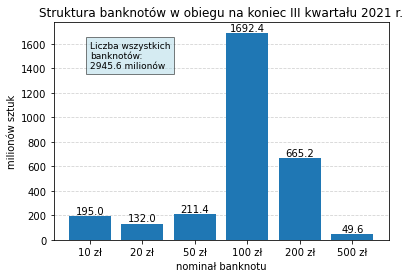

In [6]:
nominals = ["10 zł", "20 zł", "50 zł", "100 zł", "200 zł", "500 zł"]
how_much = [194.95290, 132.01500, 211.41980, 1692.41400, 665.21120, 49.55722]

fig, ax = plt.subplots()
ax.bar(nominals, how_much)
ax.bar_label(ax.containers[0],  fmt='%.1f')
ax.set_ylabel('milionów sztuk')
ax.set_xlabel('nominał banknotu')
ax.set_title('Struktura banknotów w obiegu na koniec III kwartału 2021 r.')
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.text(0, 1400, "Liczba wszystkich\nbanknotów:\n2945.6 milionów", bbox=dict(facecolor='lightblue', alpha=0.5), size = 9)

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

Jest lepszy od wykresu pierwszego, ponieważ z wykresu słupkowego łatwiej odczytuje się dane niż z wykresu kołowego, ponieważ na ogół ludzie mają trudności z rozpoznawaniem kątów. Słupki są uszeregrowane rosnąco według wartości nominału banknotu, co wydaje mi się bardziej przejrzyste i zgodne z intuicją. 

W porównaniu do drugiego wykesu, ten jest lepszy ponieważ usunięte zostały pionowe linie siatki w tle, które nic nie wnosiły. Ponadto wartości nad słupkami zostały ujednolicone: wartość podana jest z dokładnością do jednego miejca po przecinku i zostało to zaznaczone. Nazwa osi Y została zmieniona, aby lepiej się odczytywało. Dodałam także na wykresie informacje o liczbie wszystkich banknotów, aby zainteresowani mogli sobie łatwiej porównać jaką część całości stanowi dany nominał. 